In [57]:
pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)
  Using cached scipy-1.10.1-cp311-cp311-macosx_10_9_x86_64.whl (35.0 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [58]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:

df = pd.read_csv('/Users/ssanjua/Desktop/HENRY 2023/DATAFT10/LABS/PF/streamlit/data/df_actualizado_gmap_revie.csv')
df.dropna(inplace=True)

df.head()

,user_id,time,rating,text,name,gmap_id
0,1.117503e+20,2019-10-26,1,Over price on mufflers. A $47 muffler $190,Guy Saunders,0x8085780e4f382d41:0x2cf8df29f6d704a2
1,1.143015e+20,2017-07-05,1,(Translated by Google) They refused to accept ...,American dream,0x80c2c7167ad51547:0x1f3717afaab4d208
2,1.139363e+20,2017-11-14,1,horrible,titus li,0x80dcd3e1cd073227:0xea8412e5b028fb25
3,1.031334e+20,2020-12-25,1,I have tried multiple times to use this cab co...,Andrew,0x80c4b3849f4348a9:0xe7b0cda67a7c8777
4,1.122415e+20,2018-01-08,1,"The people here are stupid,the male nurse that...",Eric Maldonado,0x80dcacc17f1e10c5:0xdfe81349d3060ed3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999958 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  999958 non-null  float64
 1   time     999958 non-null  object 
 2   rating   999958 non-null  int64  
 3   text     999958 non-null  object 
 4   name     999958 non-null  object 
 5   gmap_id  999958 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 53.4+ MB


In [10]:
# Convierte la columna 'time' al tipo de datos datetime
df['time'] = pd.to_datetime(df['time'])

In [11]:
# Extrae el año de la columna 'time' y crea una nueva columna 'year'
df['year'] = df['time'].dt.year

In [12]:
df.head()

,user_id,time,rating,text,name,gmap_id,year
0,1.117503e+20,2019-10-26,1,Over price on mufflers. A $47 muffler $190,Guy Saunders,0x8085780e4f382d41:0x2cf8df29f6d704a2,2019
1,1.143015e+20,2017-07-05,1,(Translated by Google) They refused to accept ...,American dream,0x80c2c7167ad51547:0x1f3717afaab4d208,2017
2,1.139363e+20,2017-11-14,1,horrible,titus li,0x80dcd3e1cd073227:0xea8412e5b028fb25,2017
3,1.031334e+20,2020-12-25,1,I have tried multiple times to use this cab co...,Andrew,0x80c4b3849f4348a9:0xe7b0cda67a7c8777,2020
4,1.122415e+20,2018-01-08,1,"The people here are stupid,the male nurse that...",Eric Maldonado,0x80dcacc17f1e10c5:0xdfe81349d3060ed3,2018


In [13]:
# Eliminar una columna
df = df.drop('time', axis=1)
df = df.drop('user_id', axis=1)
df = df.drop('text', axis=1)
df = df.drop('name', axis=1)
df = df.drop('gmap_id', axis=1)

In [20]:
df.to_csv('reviews_google_count_MAL.csv', index=False)

In [3]:
estados = ('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District_of_Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New_Hampshire',
       'New_Jersey', 'New_Mexico', 'New_York', 'North_Carolina',
       'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode_Island', 'South_Carolina', 'South_Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming')

In [4]:
import json

df2 = pd.read_json('/Users/ssanjua/Desktop/HENRY 2023/DATAFT10/LABS/PF/streamlit/data/beauty_bussiness_review.json', lines=True)

In [5]:
df2.head()

,date,business_id,stars,text
0,2017-03-12 20:12:45,0x8752616fa217e715:0xaa370dad859b2fb0,5,Very good customer service
1,2019-09-19 09:02:25,0x87bae8b297b40863:0x68ea4b1942b711b1,4,Thank you all i am a loyal fan.
2,2019-12-02 19:06:19,0x5490415d892e4a85:0x1ae023e7e6193e1d,5,NaN
3,2019-10-05 23:21:09,0x89b426e51b864427:0x5d295021a56b4bde,3,NaN
4,2019-09-25 05:26:51,0x89c25de0b1c19e2d:0xe22f9267c78b4fea,5,NaN


In [13]:
df2.drop('business_id', axis=1, inplace=True)
df2.drop('text', axis=1, inplace=True)

In [33]:
df2.tail(10)

,stars,year
1905180,1,2020
1905181,5,2020
1905182,5,2019
1905183,5,2019
1905184,5,2018
1905185,5,2018
1905186,5,2018
1905187,5,2018
1905188,5,2017
1905189,5,2018


In [35]:
# Supongamos que tienes un DataFrame llamado df y quieres ver los valores únicos de la columna "columna_deseada"
valores_unicos = df2['year'].unique()

# Imprimir los valores únicos
print(valores_unicos)

[2017 2019 2018 2020 2021 2016 2014 2009 2015 2012 2013 2011 2010 2008
 2007]


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905190 entries, 0 to 1905189
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   stars   int64         
 2   year    int32         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 36.3 MB


In [24]:
# Convierte la columna 'time' al tipo de datos datetime
df2['date'] = pd.to_datetime(df2['date'])
# Extrae el año de la columna 'time' y crea una nueva columna 'year'
df2['year'] = df2['date'].dt.year


In [27]:
df2.drop('date', axis=1, inplace=True)

In [42]:
# Obtener el número de filas del DataFrame original
num_rows = len(df2)

# Definir el tamaño de la muestra deseada (50% del tamaño original)
sample_size = int(num_rows * 0.1)

# Realizar el muestreo aleatorio
sampled_df = df2.sample(n=sample_size, random_state=42)

# Mostrar el nuevo DataFrame reducido
print(sampled_df)

         stars  year
1109374      5  2020
431455       4  2019
1359352      5  2018
527651       5  2019
190363       5  2019
...        ...   ...
634553       5  2020
1338153      5  2019
1327850      5  2018
674999       5  2019
1557133      5  2019

[190519 rows x 2 columns]


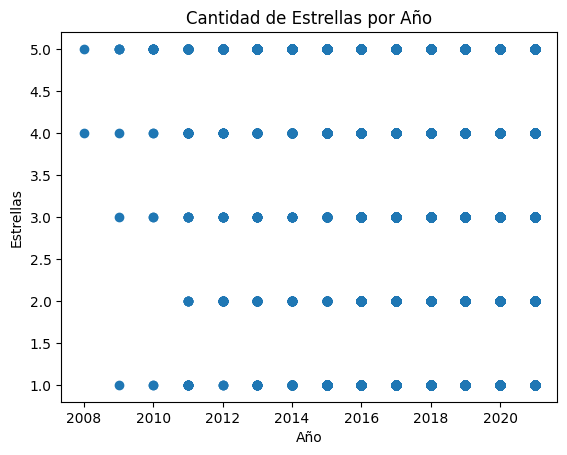

In [46]:
plt.scatter(sampled_df['year'], sampled_df['stars'])
plt.xlabel('Año')
plt.ylabel('Estrellas')
plt.title('Cantidad de Estrellas por Año')
plt.show()

In [47]:
sampled_df.to_csv('df_reviews_anio_small.csv', index=False)

df2.to_csv('df_reviews_anio.csv', index=False)

In [48]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190519 entries, 1109374 to 1557133
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   stars   190519 non-null  int64
 1   year    190519 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 3.6 MB


In [29]:
df3 = pd.read_csv('/Users/ssanjua/Desktop/HENRY 2023/DATAFT10/LABS/PF/streamlit/data/beauty_beauty_business.csv')

df3.head()

,avg_rating,id,latitude,longitude,name,num_of_reviews,state,category
0,4.3,0x80997004b58a0293:0xde1c39a7762d6066,39.251502,-119.962687,Aloha Spa Tahoe,15,NV,Beauty salon
1,4.7,0x86473bffcd9488e5:0x4770d9e83a4685f9,30.320179,-95.482123,Lasting Brows Microblading and Permanent Cosme...,87,TX,Permanent make-up clinic
2,4.4,0x88051cad6280eaa5:0x6e4e2dd4c6abbe5e,43.089607,-88.010160,Dvine Hair & Extensions,8,WI,Hair salon
3,4.7,0x80c32a4fbc1a2179:0xdac087192191635c,34.003513,-117.888046,ASTR NAIL & BEAUTY LOUNGE,65,CA,Nail salon
4,4.9,0x80dbf550ad2fc3ff:0x5a2d32417401b40b,33.133664,-117.123856,Luv Threading Studio San Marcos,8,CA,Hair removal service


In [30]:
df3.drop('id', axis=1, inplace=True)
df3.drop('name', axis=1, inplace=True)

In [31]:
df3.to_csv('df_bussiness_small.csv', index=False)

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152041 entries, 0 to 152040
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   avg_rating      152041 non-null  float64
 1   latitude        152041 non-null  float64
 2   longitude       152041 non-null  float64
 3   num_of_reviews  152041 non-null  int64  
 4   state           152041 non-null  object 
 5   category        152041 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.0+ MB


In [59]:
# Especifica la ruta del archivo pkl
ruta_pkl = '/Users/ssanjua/Desktop/HENRY 2023/DATAFT10/LABS/PF/streamlit/data/kmeans_model.pkl'

# Lee el archivo pkl y crea un DataFrame
df_4 = pd.read_pickle(ruta_pkl)

UnpicklingError: invalid load key, '\x07'.

In [62]:
df_sentimiento = pd.read_csv('../data/Analisis_Sentimientos.csv')

In [63]:
df_sentimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179830 entries, 0 to 1179829
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   name         1179830 non-null  object
 1   state        1179830 non-null  object
 2   category     1179830 non-null  object
 3   text         1179813 non-null  object
 4   year         1179830 non-null  object
 5   Sentimiento  1179830 non-null  object
dtypes: object(6)
memory usage: 54.0+ MB


In [65]:
# Obtener el número de filas del DataFrame original
num_rows = len(df_sentimiento)

# Definir el tamaño de la muestra deseada (50% del tamaño original)
sample_size = int(num_rows * 0.25)

# Realizar el muestreo aleatorio
sampled_df_sent = df_sentimiento.sample(n=sample_size, random_state=42)

# Mostrar el nuevo DataFrame reducido
print(sampled_df_sent)

                                                  name           state  \
1093703                                      Nails&Spa       Minnesota   
12469                                 Split Ends Salon        Colorado   
669035                                2k Nails And Spa         Florida   
946328                                    Aby's Unisex        Illinois   
763305                              Larkspur Salon Spa  North Carolina   
...                                                ...             ...   
390045   Sunrise Dental of Redmond - Kunal Narang, DDS        Nebraska   
1178996               Top Secret Tattoos and Piercings           Texas   
259191                                      Love Nails         Florida   
872756                             Oscar Nails and Spa         Arizona   
6130                          Rig & Co. Studio and Spa            Ohio   

                         category  \
1093703                Nail salon   
12469                  Hair salon   


In [ ]:
# Convierte la columna 'time' al tipo de datos datetime
df2['date'] = pd.to_datetime(df2['date'])
# Extrae el año de la columna 'time' y crea una nueva columna 'year'
df2['year'] = df2['date'].dt.year

In [77]:
# Convierte la columna 'time' al tipo de datos datetime
sampled_df_sent['year'] = pd.to_datetime(sampled_df_sent['year'])
# Extrae el año de la columna 'time' y crea una nueva columna 'year'
sampled_df_sent['year'] = sampled_df_sent['year'].dt.year

In [78]:
sampled_df_sent.head

,name,state,category,text,year,Sentimiento
1093703,Nails&Spa,Minnesota,Nail salon,They do an amazing job I come here all the tim...,1970,Positivo
12469,Split Ends Salon,Colorado,Hair salon,Madison is the sheez,1970,Neutral
669035,2k Nails And Spa,Florida,Nail salon,I love this place so much it's a hidden gem to...,1970,Positivo
946328,Aby's Unisex,Illinois,Beauty salon,Nice service,1970,Positivo
763305,Larkspur Salon Spa,North Carolina,Beauty salon,Awesome place loved the service,1970,Positivo


In [76]:
sampled_df_sent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294957 entries, 1093703 to 6130
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         294957 non-null  object
 1   state        294957 non-null  object
 2   category     294957 non-null  object
 3   text         294954 non-null  object
 4   year         294957 non-null  int32 
 5   Sentimiento  294957 non-null  object
dtypes: int32(1), object(5)
memory usage: 14.6+ MB


In [73]:
sampled_df_sent.to_csv('df_sentimiento_small.csv')

In [69]:
top_clusters = pd.read_csv('../data/top_clusters.csv')

In [70]:
top_clusters.head()

,Unnamed: 0,Cluster,Centroid Latitude,Centroid Longitude,Promedio_Puntaje_Reviews,Cantidad de Negocios,Negocios Competidores,Estado,Condado,Porcentaje de competición
0,0,41,27.471028,-81.516158,4.93,4117,2162,Florida,Highlands County,52.51
1,1,32,38.163285,-121.469269,4.93,2221,1155,California,San Joaquin County,52.00
2,2,20,40.120721,-75.586693,4.92,7461,3697,Pennsylvania,Chester County,49.55
3,3,48,33.801736,-115.747699,4.92,4712,2389,California,Riverside County,50.70
4,4,6,35.103770,-82.612992,4.92,6541,3173,South Carolina,Greenville County,48.51


In [90]:
from nltk.sentiment import SentimentIntensityAnalyzer

def get_sentiment(text):
        analyzer = SentimentIntensityAnalyzer()
        sentiment_scores = analyzer.polarity_scores(text)
        compound_score = sentiment_scores['compound']
        
        if compound_score > 0:
            return 'Positivo'
        elif compound_score < 0:
            return 'Negativo'
        else:
            return 'Neutral'

#mood = input('Ingresa algo')
get_sentiment('very very bad')

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/Users/ssanjua/nltk_data'
    - '/Users/ssanjua/Desktop/HENRY 2023/DATAFT10/LABS/PF/streamlit/streamlit_venv/nltk_data'
    - '/Users/ssanjua/Desktop/HENRY 2023/DATAFT10/LABS/PF/streamlit/streamlit_venv/share/nltk_data'
    - '/Users/ssanjua/Desktop/HENRY 2023/DATAFT10/LABS/PF/streamlit/streamlit_venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [91]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False